In [4]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ir= LogisticRegression()
dt= DecisionTreeClassifier()
svc = SVC(probability=True)

ensemble = VotingClassifier(estimators=[
    ('lr', ir),
    ('dt', dt),
    ('svc', svc)
], voting='soft')

ensemble.fit(X_train, y_train)
print("Ensemble model accuracy:", ensemble.score(X_test, y_test))





Ensemble model accuracy: 1.0


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
df= pd.read_csv(r"C:\Users\Lenovo\Downloads\customer_purchase_data.csv")
df.head()

features=df[['Age', 'Income', 'SpendingScore']]
target=df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


from sklearn.metrics import accuracy_score
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt= accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")


Decision Tree Accuracy: 0.52


0.9737394675305844
0.9743527808769136


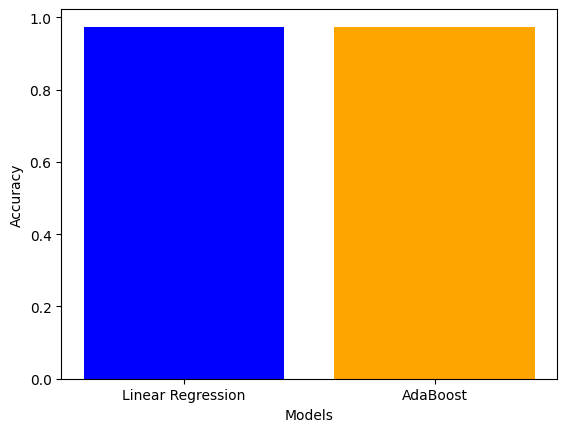

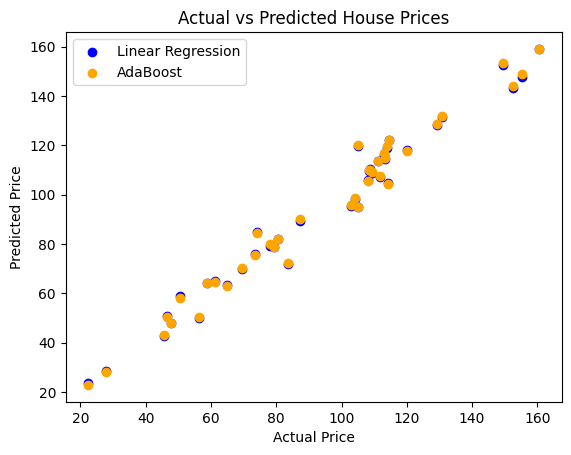

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\better_house_price_data.csv")
df.head()
X=df[['Rooms','Size_sqft','Distance_CityCenter','Age_House']]
y=df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
acc_lr= r2_score(y_test, y_pred_lr.round())
print(acc_lr)
boots= AdaBoostRegressor(lr, n_estimators=50, random_state=42)
boots.fit(X_train, y_train)
y_pred_boost=boots.predict(X_test)
acc_boost = r2_score(y_test, y_pred_boost.round())
print(acc_boost)
import matplotlib.pyplot as plt
models = ['Linear Regression', 'AdaBoost']
accuracy_values = [acc_lr, acc_boost]
plt.bar(models, accuracy_values, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_boost, color='orange', label='AdaBoost')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
df= pd.read_csv(r"C:\Users\Lenovo\Downloads\loan_approval_data.csv")
df.head()
X=df[['ApplicantIncome','LoanAmount','CreditScore','EmploymentStatus','LoanTerm']]
y=df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_lr=model1.predict(X_test)
acc_lr= accuracy_score(y_test, y_pred_lr.round())
print("Logistic Refression Model",acc_lr)


model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_dt=model2.predict(X_test)
acc_dt2= accuracy_score(y_test, y_pred_dt.round())
print("\nDecision Tree Classifier Accuracy ",acc_dt2)

model3 = SVC(probability=True)
model3.fit(X_train, y_train)
y_pred_svc = model3.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc.round())
print("\nSupport Vector Classifier Accuracy ", acc_svc)


voting_clf1 = VotingClassifier(estimators=[
    ('lr', model1), 
    ('dt', model2), 
    ('svc', model3)
], voting='soft')
voting_clf1.fit(X_train, y_train)
y_pred1 = voting_clf1.predict(X_test)
print("Voting Classifier Accuracy:", voting_clf1.score(X_test, y_test))
voting_clf2= VotingClassifier(estimators=[
    ('lr', model1), 
    ('dt', model2), 
    ('svc', model3)
], voting='hard')
voting_clf2.fit(X_train, y_train)
y_pred2= voting_clf2.predict(X_test)
print("Voting Classifier Accuracy (Hard Voting):", voting_clf2.score(X_test, y_test))


Logistic Refression Model 0.9666666666666667

Decision Tree Classifier Accuracy  0.9166666666666666

Support Vector Classifier Accuracy  0.9666666666666667
Voting Classifier Accuracy: 0.9
Voting Classifier Accuracy (Hard Voting): 0.95


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/